In [1]:
## import general libraries
import numpy as np
import pandas as pd
import re
import json
import glob
import nltk
#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import coherencemodel
from Data_Cleaning import datacleaning, datamapping, datapreprocessing
##spacy
import spacy
from nltk.corpus import stopwords

##vis
import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from nltk.stem import WordNetLemmatizer

2022-06-06 21:22:41.786531: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/lsf_10.1.0/10.1/linux3.10-glibc2.17-x86_64/lib
2022-06-06 21:22:41.786567: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
stopwords =  stopwords.words("english")
stopwords.extend(['from', 'subject', 're', 'edu', 'use', 'infineon', 'camstar','com'])
nltk.download('wordnet')
nltk.download('omw-1.4')
import en_core_web_sm
nlp = en_core_web_sm.load()

[nltk_data] Downloading package wordnet to /ifxhome/manna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /ifxhome/manna/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
# def gen_words(texts):
#     final =[]
#     texts = texts.split(" ")
#     for text in texts:
#         new = gensim.utils.simple_preprocess(text, deacc= True)
#         final.append(new)
#     return list(np.squeeze(final))
# data_words = gen_words(tickets['Desc'].loc[0])
# print(data_words)

In [4]:
# tickets["common_words"]=tickets.Desc.map(lambda x:gen_words(x))

In [5]:
# id2word = corpora.Dictionary(data_words)
# corpus =[]
# for text in data_words:
#     new = id2word.doc2bow(text)
#     corpus.append(new)
# print(corpus[0][0:20])

In [6]:
# tickets['Category'].value_counts()

In [7]:
# tickets['common_words']=tickets1['common_words']

In [8]:
# def generate_N_grams(text,ngram=1):
#     words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
# #     print("Sentence after removing stopwords:",words)
#     temp=zip(*[words[i:] for i in range(0,ngram)])
#     ans=[' '.join(ngram) for ngram in temp]
#     return ans

In [9]:
# from collections import defaultdict

In [10]:
# tickets['Category'].value_counts()

In [11]:
# invalidjob = defaultdict(int)
# missingtestssummary = defaultdict(int)
# configissue = defaultdict(int)
# camstarerror =  defaultdict(int)
# printissue = defaultdict(int)
# procedureissue = defaultdict(int)
# buttongrey = defaultdict(int)
# onhold = defaultdict(int)
# quantityissue = defaultdict(int)
# statuschange=defaultdict(int)
# lotissue=defaultdict(int)
# stmsissue=defaultdict(int)
# wrongequipment=defaultdict(int)
# trackingerror=defaultdict(int)
# httpissue =defaultdict(int)
# eafissue =defaultdict(int)
# combineissue =defaultdict(int)
# stepproblem=defaultdict(int)
# mergeissue=defaultdict(int)
# TFM =defaultdict(int)

In [12]:
# for text in tickets[tickets.Category=="invalidjob"].Desc:
#     for word in generate_N_grams(text,2):
#         invalidjob[word]+=1
# for text in tickets[tickets.Category=="missingtestssummary"].Desc:
#     for word in generate_N_grams(text,2):
#         missingtestssummary[word]+=1
# for text in tickets[tickets.Category=="camstarerror"].Desc:
#     for word in generate_N_grams(text,2):
#         camstarerror[word]+=1
# for text in tickets[tickets.Category=="procedureissue"].Desc:
#     for word in generate_N_grams(text,2):
#         procedureissue[word]+=1
# for text in tickets[tickets.Category=="buttongrey"].Desc:
#     for word in generate_N_grams(text,2):
#         buttongrey[word]+=1
# for text in tickets[tickets.Category=="onhold"].Desc:
#     for word in generate_N_grams(text,2):
#         onhold[word]+=1
# for text in tickets[tickets.Category=="quantityissue"].Desc:
#     for word in generate_N_grams(text,2):
#         quantityissue[word]+=1
        
# for text in tickets[tickets.Category=="statuschange"].Desc:
#     for word in generate_N_grams(text,2):
#         statuschange[word]+=1
# for text in tickets[tickets.Category=="lotissue"].Desc:
#     for word in generate_N_grams(text,2):
#         lotissue[word]+=1
# for text in tickets[tickets.Category=="stmsissue"].Desc:
#     for word in generate_N_grams(text,2):
#         stmsissue[word]+=1
# for text in tickets[tickets.Category=="wrongequipment"].Desc:
#     for word in generate_N_grams(text,2):
#         wrongequipment[word]+=1
# for text in tickets[tickets.Category=="trackingerror"].Desc:
#     for word in generate_N_grams(text,2):
#         trackingerror[word]+=1
# for text in tickets[tickets.Category=="httpissue"].Desc:
#     for word in generate_N_grams(text,2):
#         httpissue[word]+=1
# for text in tickets[tickets.Category=="eafissue"].Desc:
#     for word in generate_N_grams(text,2):
#         eafissue[word]+=1
# for text in tickets[tickets.Category=="combineissue"].Desc:
#     for word in generate_N_grams(text,2):
#         combineissue[word]+=1
# for text in tickets[tickets.Category=="stepproblem"].Desc:
#     for word in generate_N_grams(text,2):
#         stepproblem[word]+=1
# for text in tickets[tickets.Category=="mergeissue"].Desc:
#     for word in generate_N_grams(text,2):
#         mergeissue[word]+=1
# for text in tickets[tickets.Category=="TFM"].Desc:
#     for word in generate_N_grams(text,2):
#         TFM[word]+=1

In [13]:
initialize = True
# lemmatization
if initialize:
    nltk.download('words')
# tickets1 = pd.read_excel('tickets (6).xlsx')
# tickets1 = tickets1.fillna('')

[nltk_data] Downloading package words to /ifxhome/manna/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
df_reviews=pd.read_excel('tickets (6).xlsx')
df_reviews

df_reviews.dropna(subset=['Desc'], how='all', inplace=True)

#remove all languages except english
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
words = set(nltk.corpus.words.words())

def keep_english(x):
    englishwords=" ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha())
    return englishwords

# df_reviews['Desc']=df_reviews['Desc'].apply(keep_english)
df_reviews['Desc'] = df_reviews['Desc'].map(lambda x: re.sub('[,\.!?]', '', x))
df_reviews['Desc']

import glob
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
nltk.download('stopwords')
# !pip install pyLDAvis
import pyLDAvis
from nltk.corpus import stopwords
stopwords=stopwords.words("english")
stopwords.extend(['from', 'subject', 're', 'edu', 'use', 'infineon', 'camstar','com'])

import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
# lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)
import en_core_web_sm
nlp = en_core_web_sm.load()

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

def gen_words(texts):
    final=[]
    for text in texts:
        new=gensim.utils.simple_preprocess(text,deacc=True)
        final.append(new)
    return (final)
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in texts]

fileref = 'lookup.xlsx'
# cleaned = datacleaning(tickets)
processed = datamapping(df_reviews,fileref)
data_words=gen_words(processed['Desc'])
data_words = remove_stopwords(data_words)
lem = WordNetLemmatizer()
for i in range(len(data_words)):
    text_list = data_words[i]
#     text_list = [lancaster.stem(word) for word in text_list]
    text_list = [lem.lemmatize(word) for word in text_list]
    text_list = [lem.lemmatize(word, 'v') for word in text_list]
    text_list = [lem.lemmatize(word, 'a') for word in text_list]
    text_list = [lem.lemmatize(word, 'r') for word in text_list]
    text_list = [lem.lemmatize(word, 's') for word in text_list]
    df_reviews["desc"].loc[i]= " ".join(text_list)


lemmatized_texts=df_reviews['desc']

#get word tokens


# data_words=gen_words(lemmatized_texts)
data_words = remove_stopwords(data_words)

In [26]:
def join_words(l):
    return " ".join(l)
df_reviews['common_words'] =  data_words
df_reviews['common_words'] = df_reviews.common_words.map(lambda x:join_words(x))

In [23]:
import numpy as np
from sklearn import decomposition
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from fuzzywuzzy import fuzz
import gensim.corpora as corpora

# tickets = pd.read_excel('tickets (6).xlsx')
# tickets = tickets.fillna('')
tickets = data_words

def topic_gen(tickets, num_topics, num_words):
    lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,learning_decay=0.5, learning_method='online',learning_offset=50,n_jobs=-1,evaluate_every = -1,batch_size=128, random_state=100)
    vectorizer_cv = TfidfVectorizer(analyzer='word',ngram_range=(2,3))
    X_cv = vectorizer_cv.fit_transform(df_reviews['common_words']).toarray()
    W1=lda.fit_transform(X_cv)
    H1=lda.components_
    num_words=num_words
    vocab=np.array(vectorizer_cv.get_feature_names())
    top_words=lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
    topic_words=([top_words(t) for t in H1])
    topics=[' '.join(t) for t in topic_words]
    colnames=["Topic"+ str(i) for i in range(lda.n_components)]
    df_doc_topic=pd.DataFrame(np.round(W1,2), columns=colnames)
    significant_topic=np.argmax(df_doc_topic.values,axis=1)
    return [lda, X_cv, topics, df_doc_topic, significant_topic]

def table_formatting(df_doc_topic, tickets):
    df_topic_table=pd.concat([tickets,df_doc_topic],axis=1)
    df_doc_topic=df_doc_topic.reset_index(drop=True)
#     df_topic_table=df_topic_table.drop('level_0',axis=1)
    df_topic_table=df_topic_table.drop('index',axis=1)
    df_topic_table=df_topic_table.drop('Unnamed: 0',axis=1)
    df_topic_table=df_topic_table.groupby(['Ticketid']).mean().reset_index()
    return df_topic_table

def get_inference(model, vectorizer, topics, text, threshold):
    v_text = vectorizer.transform([text])
    score = model.transform(v_text)

    labels = set()
    for i in range(len(score[0])):
        if score[0][i] > threshold:
            labels.add(topics[i])

    if not labels:
        return 'None', -1, set()

    return topics[np.argmax(score)], score, labels

In [27]:
num_topics = 30
num_words = 40
[lda, X_cv, topics, df_doc_topic, significant_topic] = topic_gen(tickets, num_topics, num_words)
df_topic_table = table_formatting(df_doc_topic, tickets)

/home/fibebocai/virtualenvs/fibebocai_text/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

In [ ]:
data_words

In [3]:
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
lsa_topics = ['a','b','c','d','e','f','g','h','i','j','a1','b1','c1','d1','e1','f1','g1','h1','i1','j1','a2','b2','c2','d2','e2','f2','g2','h2','i2','j2']
n_features = 1000
n_components = 30
n_top_words = 20
tfidf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,max_features=n_features, stop_words='english', ngram_range=(2, 3))
tfidf = tfidf_vectorizer.fit_transform(df_reviews['common_words'])
# lsa = TruncatedSVD(n_components=n_components, random_state=1, algorithm='arpack').fit(tfidf)
lda = LatentDirichletAllocation(n_components=n_components, max_iter=10,learning_decay=0.5, learning_method='online',learning_offset=50,n_jobs=-1,evaluate_every = -1,batch_size=128, random_state=100).fit(tfidf)
def get_model_topics(model, vectorizer, topics, n_top_words=n_top_words):
    word_dict = {}
    feature_names = vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        word_dict[topics[topic_idx]] = top_features

    return pd.DataFrame(word_dict)
def get_inference(model, vectorizer, topics, text, threshold):
    v_text = vectorizer.transform([text])
    score = model.transform(v_text)

    labels = set()
    for i in range(len(score[0])):
        if score[0][i] > threshold:
            labels.add(topics[i])

    if not labels:
        return 'None', -1, set()

    return topics[np.argmax(score)], score, labels
text = df_reviews.loc[0]['common_words']

# print(get_model_topics(nmf, tfidf_vectorizer, nmf_topics))
# topic, score, _ = get_inference(nmf, tfidf_vectorizer, nmf_topics, text, 0)
# print(topic, score)

# print(get_model_topics(lsa, tfidf_vectorizer, lsa_topics))
# topic, score, _ = get_inference(lsa, tfidf_vectorizer, lsa_topics, text, 0)
# print(topic, score)

print(get_model_topics(lda, tfidf_vectorizer, lsa_topics))
topic, score, _ = get_inference(lda, tfidf_vectorizer, lsa_topics, text, 0)
print(topic, score)

NameError: name 'CountVectorizer' is not defined

In [40]:
from sklearn.model_selection import GridSearchCV
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(tfidf)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [10, 15, 20, 25, 30]})

In [44]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(tfidf))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 30}
Best Log Likelihood Score:  -98936.05200408073
Model Perplexity:  101.63390263279145


In [79]:
# df_topic_table=pd.concat([tickets,df_doc_topic],axis=1)
# df_topic_table

In [24]:
df_topic_table[df_topic_table["Ticketid"]=="INC000005305831"]

,Ticketid,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9
4232,INC000005305831,0.02,0.02,0.02,0.84,0.02,0.02,0.02,0.02,0.02,0.02


In [102]:
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# (n_samples, n_features), n_digits = X_cv.shape, np.unique(tickets['Category']).size
# pca= PCA(n_components=2)
# reduced_data = pca.fit_transform(X_cv)
# kmeans = KMeans(init="k-means++", n_clusters=20, n_init=4)
# kmeans.fit(reduced_data)

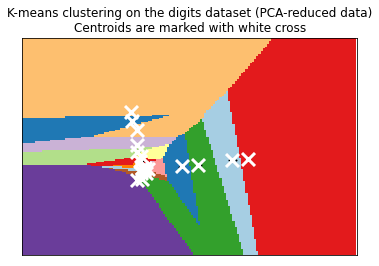

In [70]:
# # Step size of the mesh. Decrease to increase the quality of the VQ.
# h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# # Plot the decision boundary. For that, we will assign a color to each
# x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
# y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# # Obtain labels for each point in mesh. Use last trained model.
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.figure(1)
# plt.clf()
# plt.imshow(
#     Z,
#     interpolation="nearest",
#     extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#     cmap=plt.cm.Paired,
#     aspect="auto",
#     origin="lower",
# )

# plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# # Plot the centroids as a white X
# centroids = kmeans.cluster_centers_
# plt.scatter(
#     centroids[:, 0],
#     centroids[:, 1],
#     marker="x",
#     s=169,
#     linewidths=3,
#     color="w",
#     zorder=10,
# )
# plt.title(
#     "K-means clustering on the digits dataset (PCA-reduced data)\n"
#     "Centroids are marked with white cross"
# )
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
# plt.show()

In [103]:
# kmeans.predict(pca.fit_transform(X_cv[99]).reshape(1,-1))

In [104]:
# pca.fit_transform(X_cv[0].reshape(1,-1))

In [108]:
n_features

3240